In [ ]:
import pathlib
!pip install matplotlib
!pip install opencv-python
!pip install tensorflow-hub
!pip install scikit-learn


You should consider upgrading via the 'c:\users\thathireddyeswareddy\documents\rice\venv\scripts\python.exe -m pip install --upgrade pip' command.


  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)


You should consider upgrading via the 'c:\users\thathireddyeswareddy\documents\rice\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
data_dir = "Rice_Image_Dataset" # Datasets path
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('Rice_Image_Dataset')

In [6]:
arborio = list(data_dir.glob('Arborio/*'))[:600]
basmati = list(data_dir.glob('Basmati/*'))[:600]
ipsala = list(data_dir.glob('Ipsala/*'))[:600]
jasmine = list(data_dir.glob('Jasmine/*'))[:600]
karacadag = list(data_dir.glob('Karacadag/*'))[:600]

In [15]:
# Importing necessary libraries

# Building deep learning models
import tensorflow as tf
from tensorflow import keras
# For accessing pre-trained models
import tensorflow_hub as hub
# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import os
import numpy as np
import pathlib

In [16]:
# Contains the images path
df_images = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag' : karacadag
}

# Contains numerical labels for the categories
df_labels = {
    'arborio' : 0,
    'basmati' : 1,
    'ipsala' : 2,
    'jasmine' : 3,
    'karacadag' : 4
}

In [17]:
img = cv2.imread(str(df_images['arborio'][0])) # Converting it into numerical arrays
img.shape # Its currently 250 by 250 by 3

(250, 250, 3)

In [18]:
X, y = [], [] # X = images, y = labels
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) #
        X.append(resized_img)
        y.append(df_labels[label])

In [19]:
# Standarizing
X = np.array(X)
X = X/255
y = np.array(y)

# Separating data into training, test and validation sets
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

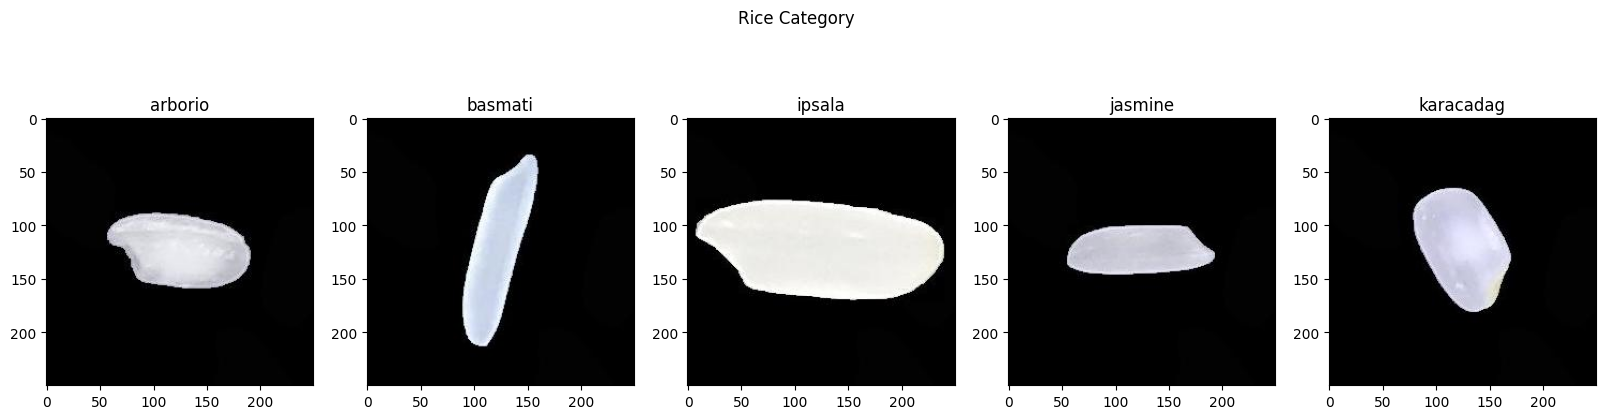

In [21]:
import matplotlib.image as img


fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
arborio_image = img.imread(arborio[0])
basmati_image = img.imread(basmati[0])
ipsala_image = img.imread(ipsala[0])
jasmine_image = img.imread(jasmine[0])
karacadag_image = img.imread(karacadag[0])

ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')

ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)

In [22]:
mobile_net = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4' # MobileNetv4 link
mobile_net = hub.KerasLayer(
    mobile_net, input_shape=(224,224, 3), trainable=False) # Removing the last layer

In [34]:
num_label = 5 # number of labels

# model = tf.keras.models.Sequential([
#     mobile_net,
#     keras.layers.Dense(num_label)
# ])

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])



In [45]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [40]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 198, 198, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 99, 99, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 97, 97, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,549 (127.14 KB)

 Trainable params: 32,549 (127.14 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
print(X_train.shape)
print(y_train.shape)


(2250, 224, 224, 3)
(2250, 5)


In [42]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 153ms/step - accuracy: 0.2212 - loss: 1.5344 - val_accuracy: 0.5638 - val_loss: 1.0152
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - accuracy: 0.5405 - loss: 0.9625 - val_accuracy: 0.6543 - val_loss: 0.9332
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - accuracy: 0.6046 - loss: 0.8160 - val_accuracy: 0.8032 - val_loss: 0.6872
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - accuracy: 0.7460 - loss: 0.6618 - val_accuracy: 0.8670 - val_loss: 0.5410
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - accuracy: 0.8431 - loss: 0.4939 - val_accuracy: 0.8564 - val_loss: 0.4798
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 181ms/step - accuracy: 0.8731 - loss: 0.4023 - val_accuracy: 0.8883 - val_loss: 0.3645
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - accuracy: 0.9242 - loss: 0.3053 - val_accuracy: 0.9043 - val_loss: 0.2614
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 154ms/step - accuracy: 0.9045 - loss: 0.2690 - val_accu

In [46]:
from tensorflow.keras.utils import to_categorical

y_test = to_categorical(y_test, num_classes=5)

model.evaluate(X_test, y_test)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9812 - loss: 0.1072


[0.12159948796033859, 0.9697508811950684]

In [48]:
print(y_test.shape)
print(y_test[:5])
print(y_pred_bool[:5])


(562, 5)
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]
[4 4 1 4 2]


In [50]:
y_test_labels = np.argmax(y_test, axis=1)

In [51]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot to labels if needed

print(classification_report(y_test_labels, y_pred_bool))


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       113
           1       1.00      0.95      0.97       101
           2       1.00      1.00      1.00       119
           3       0.88      1.00      0.93       107
           4       0.99      0.98      0.98       122

    accuracy                           0.97       562
   macro avg       0.97      0.97      0.97       562
weighted avg       0.97      0.97      0.97       562



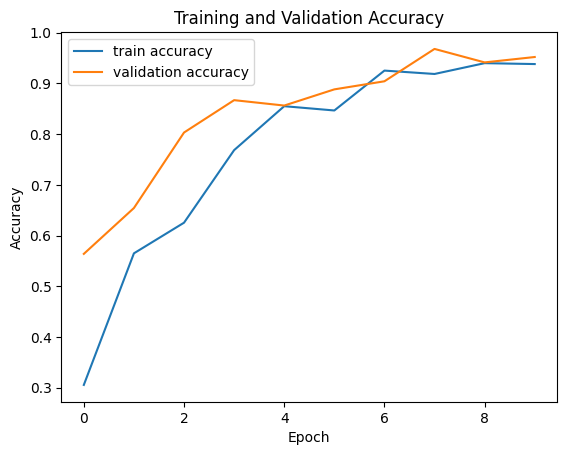

In [54]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


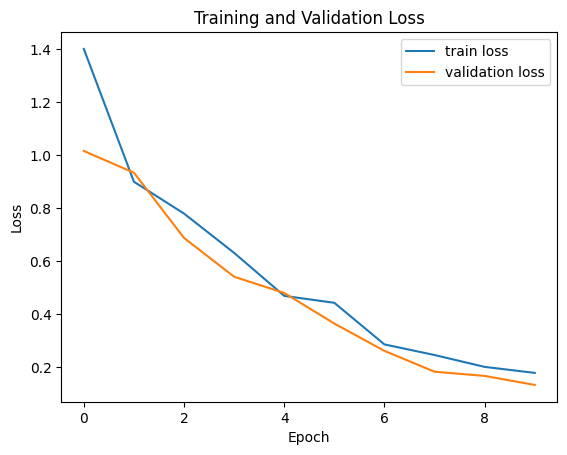

In [56]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [58]:
a1 = cv2.imread("Rice_Image_Dataset/Basmati/basmati (10).jpg")
a1 = cv2.resize(a1,(224,224))
a1 = np.array(a1)
a1 = a1/255
a1 = np.expand_dims(a1, 0)
pred = model.predict(a1)
pred = pred.argmax()
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


np.int64(1)

In [59]:
for i, j in df_labels.items():
    if pred == j:
        print(i)

basmati


In [60]:
model.save("rice.h5")